<a href="https://colab.research.google.com/github/ernesmf23/ML-y-Analisis-de-Datos/blob/main/Analisis_datos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. CARGAR BASES DE DATOS

In [ ]:
# Importar todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, precision_recall_curve)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

In [ ]:
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# 1. Cargar los datos
from google.colab import files
uploaded = files.upload()  # Sube tu archivo predictive_maintenance.csv

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [ ]:
# Leer el dataset
df = pd.read_csv('predictive_maintenance.csv')

In [ ]:
# Mostrar las primeras filas
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


#2. PREPROCESAMIENTO

In [ ]:
# Filtrar solo fallas (Target = 1) y excluir "No Failure" y "Random Failure"
df_fallas = df[(df['Target'] == 1) & (df['Failure Type'] != 'No Failure') & (df['Failure Type'] != 'Random Failure')].copy()

In [ ]:
# Mostrar las primeras filas
print(df_fallas.head())
print(df_fallas.info())

     UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
50    51     L47230    L                298.9                    309.1   
69    70     L47249    L                298.9                    309.0   
77    78     L47257    L                298.8                    308.9   
160  161     L47340    L                298.4                    308.2   
161  162     L47341    L                298.3                    308.1   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
50                     2861          4.6              143       1   
69                     1410         65.7              191       1   
77                     1455         41.3              208       1   
160                    1282         60.7              216       1   
161                    1412         52.3              218       1   

           Failure Type  
50        Power Failure  
69        Power Failure  
77    Tool Wear Failure  
160  Overstrain Failure  
161  Overs

In [ ]:
# Limpieza adicional
df_fallas = df_fallas.drop(['UDI', 'Product ID', 'Target'], axis=1)

# Codificar la variable objetivo (tipos de falla)
le = LabelEncoder()
df_fallas['Failure Type'] = le.fit_transform(df_fallas['Failure Type'])

# Codificar variables categóricas (Type)
df_fallas = pd.get_dummies(df_fallas, columns=['Type'], drop_first=True)

# Separar características y variable objetivo
X = df_fallas.drop('Failure Type', axis=1)
y = df_fallas['Failure Type']


In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#3. MODELADO Y EVALUACION MULTICLASE


=== Entrenando SVC ===
Accuracy: 0.8485
Reporte de clasificación:
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.89      0.94      0.91        34
      Overstrain Failure       0.71      0.87      0.78        23
           Power Failure       0.88      0.79      0.83        28
       Tool Wear Failure       1.00      0.71      0.83        14

                accuracy                           0.85        99
               macro avg       0.87      0.83      0.84        99
            weighted avg       0.86      0.85      0.85        99



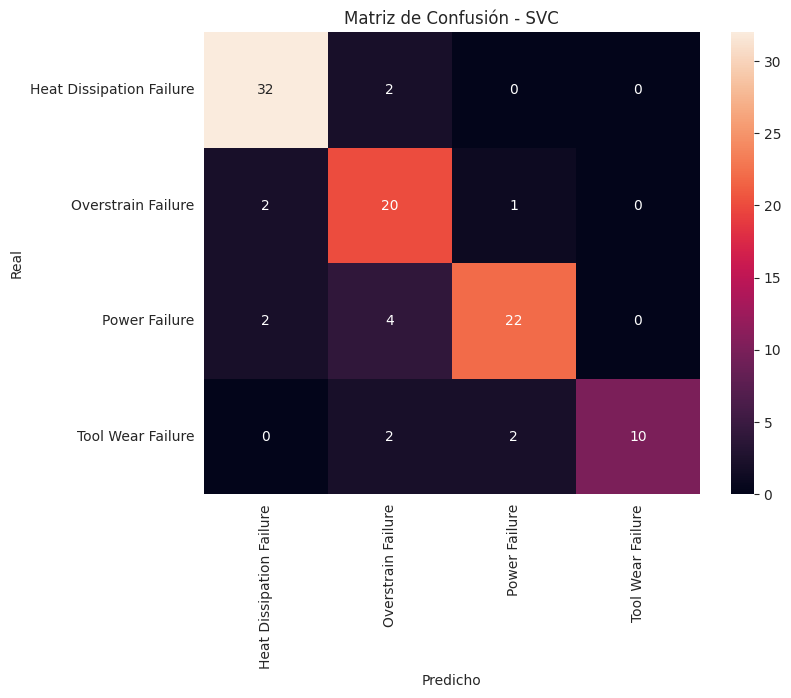


=== Entrenando Random Forest ===
Accuracy: 0.8586
Reporte de clasificación:
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.91      0.91      0.91        34
      Overstrain Failure       0.72      0.78      0.75        23
           Power Failure       0.89      0.89      0.89        28
       Tool Wear Failure       0.92      0.79      0.85        14

                accuracy                           0.86        99
               macro avg       0.86      0.84      0.85        99
            weighted avg       0.86      0.86      0.86        99



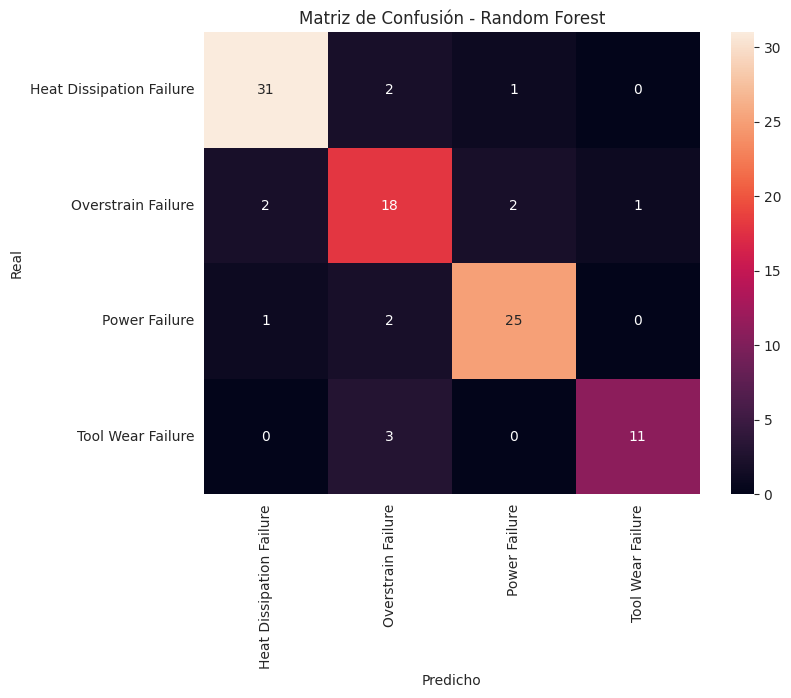


=== Entrenando XGBoost ===
Accuracy: 0.8687
Reporte de clasificación:
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.91      0.94      0.93        34
      Overstrain Failure       0.77      0.74      0.76        23
           Power Failure       0.87      0.96      0.92        28
       Tool Wear Failure       0.91      0.71      0.80        14

                accuracy                           0.87        99
               macro avg       0.87      0.84      0.85        99
            weighted avg       0.87      0.87      0.87        99



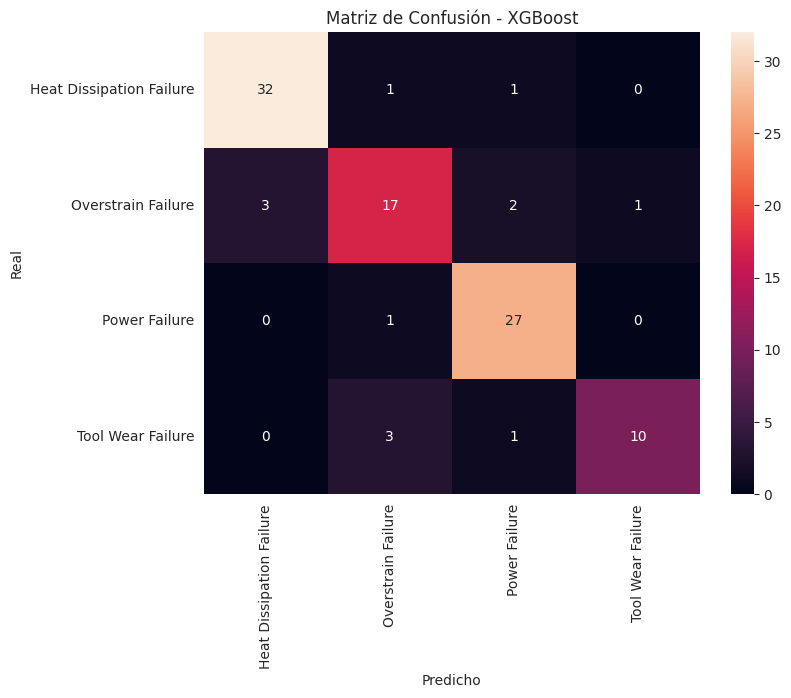

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de modelos
models = {
    'SVC': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss')
}

# Entrenamiento y evaluación
results = {}

for name, model in models.items():
    print(f"\n=== Entrenando {name} ===")

    # Entrenar modelo
    model.fit(X_train_scaled, y_train)

    # Predecir
    y_pred = model.predict(X_test_scaled)

    # Evaluar
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, target_names=le.classes_),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Mostrar resultados
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print("Reporte de clasificación:\n", results[name]['report'])

    # Matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Matriz de Confusión - {name}')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

model_comparison = []

# Suponiendo que y_test contiene etiquetas como strings o enteros
classes = list(models.values())[0].classes_  # O usa sorted(set(y_test))

# Binariza las clases para calcular ROC AUC multiclase
y_test_bin = label_binarize(y_test, classes=classes)

for name, model in models.items():
    print(f"\n=== Evaluando {name} ===")
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)

    accuracy = accuracy_score(y_test, y_pred)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']

    # Calcular AUC si se puede
    try:
        auc = roc_auc_score(y_test_bin, y_prob, average="macro", multi_class="ovr")
    except Exception as e:
        auc = None
        print(f"No se pudo calcular ROC AUC para {name}: {e}")

    model_comparison.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision (macro avg)': precision,
        'Recall (macro avg)': recall,
        'F1-score (macro avg)': f1,
        'ROC AUC (macro avg)': auc
    })

df_resultados = pd.DataFrame(model_comparison)
df_resultados = df_resultados.sort_values(by='F1-score (macro avg)', ascending=False)
print("\n=== Comparación de Modelos ===")
print(df_resultados.round(4))




=== Evaluando SVC ===

=== Evaluando Random Forest ===

=== Evaluando XGBoost ===

=== Comparación de Modelos ===
          Modelo  Accuracy  Precision (macro avg)  Recall (macro avg)  \
1  Random Forest    0.8586                 0.8603              0.8432   
2        XGBoost    0.8687                 0.8668              0.8397   
0            SVC    0.8485                 0.8708              0.8277   

   F1-score (macro avg)  ROC AUC (macro avg)  
1                0.8502               0.9804  
2                0.8496               0.9816  
0                0.8405               0.9735  


#4. OPTIMIZACION DE HIPERPARAMETROS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Preprocesamiento ===
# Suponiendo que tienes un DataFrame llamado df
# df = pd.read_csv("your_dataset.csv")

# Separar X e y
X = df.drop(columns=['Failure Type'])
y = df['Failure Type']

# Codificar etiquetas
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# === 2. Modelo 1: Random Forest Optimizado ===
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# === 3. Modelo 2: XGBoost Optimizado ===
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# === 4. Evaluación de ambos modelos ===

def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n=== {nombre} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score (macro):", f1_score(y_true, y_pred, average='macro'))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()

evaluar_modelo("Random Forest Optimizado", y_test, y_pred_rf)
evaluar_modelo("XGBoost Optimizado", y_test, y_pred_xgb)

# === 5. Comparación de métricas en tabla ===

results = pd.DataFrame({
    'Modelo': ['Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'F1-score (macro avg)': [
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_xgb, average='macro')
    ]
})

print("\n=== Comparación de Modelos ===")
print(results.round(4))


ValueError: could not convert string to float: 'M14860'

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir parámetros para XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Búsqueda de hiperparámetros
xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)

print("\n=== XGBoost Optimizado ===")
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))


=== XGBoost Optimizado ===
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.8788
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.89      0.94      0.91        34
      Overstrain Failure       0.84      0.70      0.76        23
           Power Failure       0.87      0.96      0.92        28
       Tool Wear Failure       0.92      0.86      0.89        14

                accuracy                           0.88        99
               macro avg       0.88      0.86      0.87        99
            weighted avg       0.88      0.88      0.88        99



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarizar las clases para AUC multiclase
classes = sorted(set(y_train))
y_test_bin = label_binarize(y_test, classes=classes)

# Definir la grilla de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Inicializar el modelo base
rf = RandomForestClassifier(random_state=42)

# Buscar la mejor combinación de parámetros
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Predecir con el mejor modelo encontrado
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)

# Métricas
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf, target_names=le.classes_)

# Calcular ROC AUC macro
try:
    auc = roc_auc_score(y_test_bin, y_prob_rf, average='macro', multi_class='ovr')
except Exception as e:
    auc = None
    print(f"No se pudo calcular el AUC: {e}")

# Imprimir resultados
print("\n=== Random Forest Optimizado ===")
print(f"Mejores parámetros: {grid_search_rf.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(report)
print(f"ROC AUC (macro avg): {auc:.4f}" if auc else "ROC AUC no disponible")



=== Random Forest Optimizado ===
Mejores parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8586
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.91      0.91      0.91        34
      Overstrain Failure       0.72      0.78      0.75        23
           Power Failure       0.89      0.89      0.89        28
       Tool Wear Failure       0.92      0.79      0.85        14

                accuracy                           0.86        99
               macro avg       0.86      0.84      0.85        99
            weighted avg       0.86      0.86      0.86        99

ROC AUC (macro avg): 0.9805


#4. ANALISIS DE IMPORTANCIA DE CARACTERISTICAS

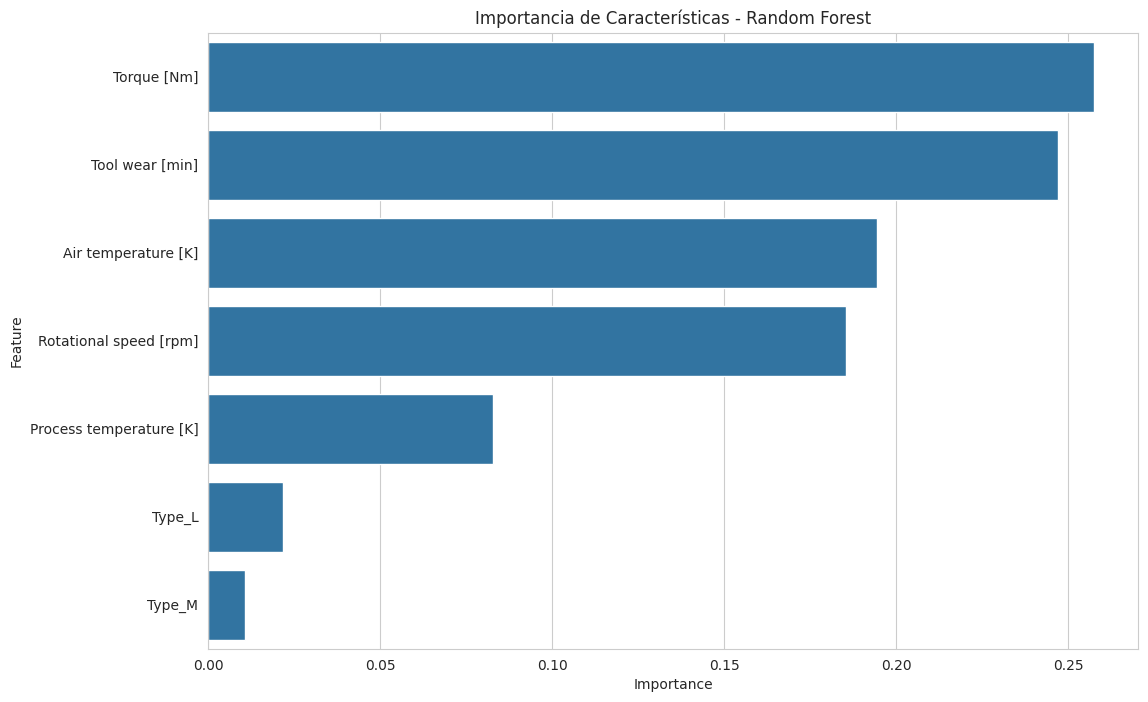

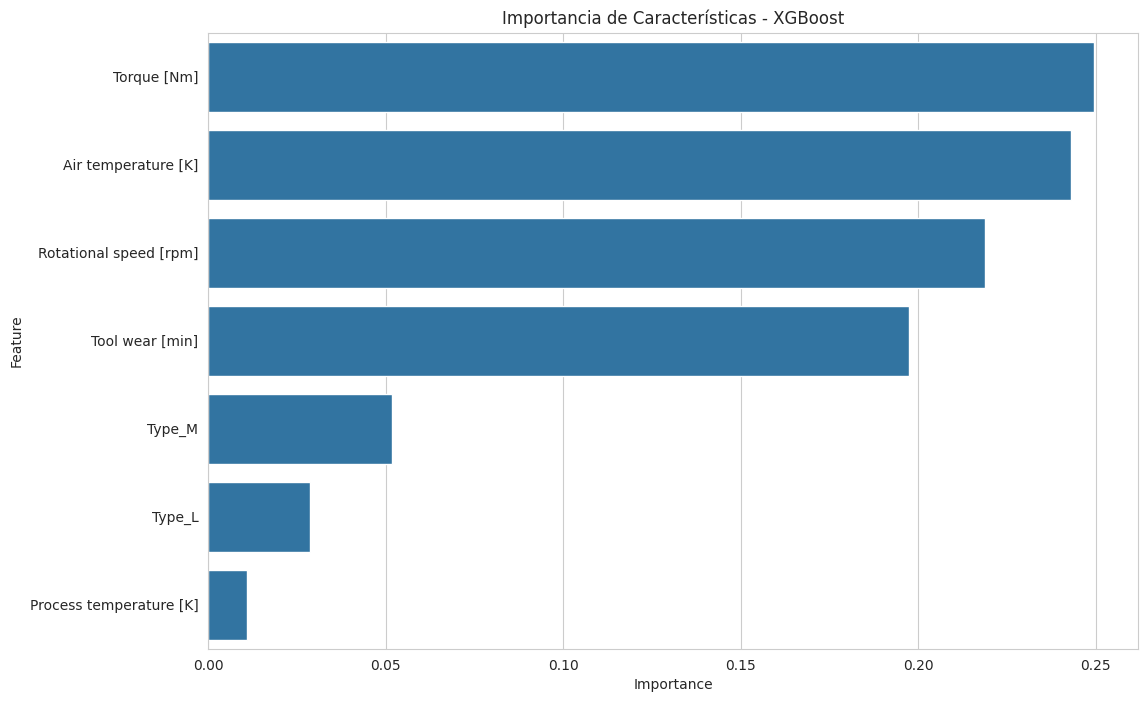

In [ ]:
# Para Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de Características - Random Forest')
plt.show()

# Para XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)

importances = xgb.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de Características - XGBoost')
plt.show()

#6. CUADROS COMPARATIVOS

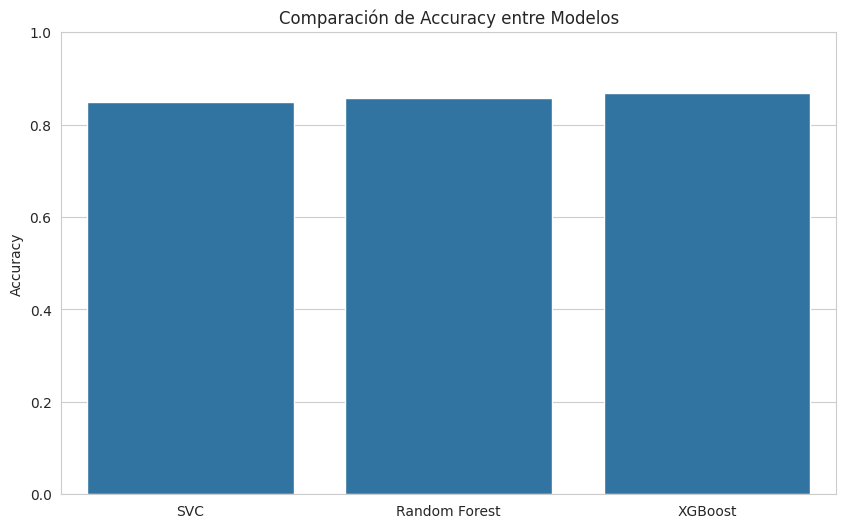

In [ ]:
# Comparar accuracy entre modelos
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Comparación de Accuracy entre Modelos')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
#